# x0 cut prediction

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

## Loading the data

In [22]:
# Load the data using pandas
data = pd.read_csv('../data/cut_x0.csv')
data = data.head(-1000) # remove last experiment
data.head(10)

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50,tp,deviationc
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.000000,0.543273
1,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.004115,0.541849
2,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.008230,0.540459
3,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.012346,0.539104
4,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.016461,0.537783
5,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.020576,0.536301
6,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.024691,0.534856
7,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.028807,0.533446
8,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.032922,0.532073
9,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.037037,0.530738


## Creating the regressor

In [23]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'tp',
    output = 'deviationc'
)

In [24]:
# Print a summary of the data
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Position variable:
	- tp : numerical, [ 0.0 / 5.0 ]
Output variable:
	- deviationc : numerical, [ -3.16506211149574 / 7.228601057768613 ]

Inputs
------------------------------------------------------------

        Blechdicke  Niederhalterkraft  Ziehspalt  Einlegeposition  Ziehtiefe  \
0             1.01                410        2.4               -5         30   
1             1.01                410        2.4               -5         30   
2             1.01                410        2.4               -5         30   
3             1.01                410        2.4               -5         30   
4             1.01                410        2.

## Training methods

### Autotuning

In [5]:
best_config = reg.autotune(
    save_path='best_model',
    trials=100,
    max_epochs=50, 
    layers=[3, 5],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)

[I 2022-04-22 15:29:48,228] A new study created in memory with name: no-name-662c62b2-2629-4ab2-ae11-4ddb6387b192


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:30:54,148] Trial 0 finished with value: 1.1262449026107788 and parameters: {'nb_layers': 4, 'n_units_l0': 64, 'n_units_l1': 64, 'n_units_l2': 192, 'n_units_l3': 256, 'learning_rate': 2.4872887262957704e-05, 'dropout': 0.30000000000000004}. Best is trial 0 with value: 1.1262449026107788.


INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:31:46,567] Trial 1 finished with value: 0.6196686029434204 and parameters: {'nb_layers': 3, 'n_units_l0': 64, 'n_units_l1': 128, 'n_units_l2': 128, 'learning_rate': 0.0008696121514406662, 'dropout': 0.30000000000000004}. Best is trial 1 with value: 0.6196686029434204.
[I 2022-04-22 15:34:59,075] Trial 2 finished with value: 0.6902032494544983 and parameters: {'nb_layers': 5, 'n_units_l0': 64, 'n_units_l1': 256, 'n_units_l2': 256, 'n_units_l3': 192, 'n_units_l4': 192, 'learning_rate': 0.000575508786530404, 'dropout': 0.1}. Best is trial 1 with value: 0.6196686029434204.
[I 2022-04-22 15:36:14,763] Trial 3 finished with value: 0.6263421177864075 and parameters: {'nb_layers': 4, 'n_units_l0': 256, 'n_units_l1': 256, 'n_units_l2': 128, 'n_units_l3': 192, 'learning_rate': 1.0072643661046669e-05, 'dropout': 0.5}. Best is trial 1 with value: 0.6196686029434204.
[I 2022-04-22 15:37:30,912] Trial 4 finished with value: 2.110088586807251 and parameters: {'nb_layers': 5, 'n_units

INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:39:36,582] Trial 6 finished with value: 0.11738833785057068 and parameters: {'nb_layers': 5, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2': 128, 'n_units_l3': 64, 'n_units_l4': 192, 'learning_rate': 1.1562945295248613e-05, 'dropout': 0.0}. Best is trial 6 with value: 0.11738833785057068.
[I 2022-04-22 15:40:34,895] Trial 7 finished with value: 0.3898913264274597 and parameters: {'nb_layers': 3, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2': 192, 'learning_rate': 2.837024662168218e-05, 'dropout': 0.4}. Best is trial 6 with value: 0.11738833785057068.
[I 2022-04-22 15:41:27,652] Trial 8 finished with value: 0.5211642384529114 and parameters: {'nb_layers': 3, 'n_units_l0': 256, 'n_units_l1': 64, 'n_units_l2': 64, 'learning_rate': 0.0006251453121826398, 'dropout': 0.4}. Best is trial 6 with value: 0.11738833785057068.


INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:42:25,342] Trial 9 finished with value: 0.09789884090423584 and parameters: {'nb_layers': 5, 'n_units_l0': 64, 'n_units_l1': 256, 'n_units_l2': 128, 'n_units_l3': 192, 'n_units_l4': 64, 'learning_rate': 0.0006862525293245662, 'dropout': 0.0}. Best is trial 9 with value: 0.09789884090423584.
[I 2022-04-22 15:43:35,655] Trial 10 finished with value: 0.1988394558429718 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 256, 'n_units_l2': 64, 'n_units_l3': 64, 'n_units_l4': 64, 'learning_rate': 0.00015153131881540208, 'dropout': 0.1}. Best is trial 9 with value: 0.09789884090423584.


INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:44:31,111] Trial 11 finished with value: 0.0697050392627716 and parameters: {'nb_layers': 5, 'n_units_l0': 128, 'n_units_l1': 192, 'n_units_l2': 128, 'n_units_l3': 64, 'n_units_l4': 64, 'learning_rate': 0.00018269819328068596, 'dropout': 0.0}. Best is trial 11 with value: 0.0697050392627716.
[I 2022-04-22 15:45:24,497] Trial 12 finished with value: 0.07592123746871948 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 64, 'n_units_l3': 128, 'n_units_l4': 64, 'learning_rate': 0.0002229744087283451, 'dropout': 0.0}. Best is trial 11 with value: 0.0697050392627716.
[I 2022-04-22 15:46:33,176] Trial 13 finished with value: 0.23050621151924133 and parameters: {'nb_layers': 5, 'n_units_l0': 192, 'n_units_l1': 128, 'n_units_l2': 64, 'n_units_l3': 128, 'n_units_l4': 64, 'learning_rate': 0.00019963098437564942, 'dropout': 0.1}. Best is trial 11 with value: 0.0697050392627716.
[I 2022-04-22 15:47:36,029] Trial 14 finished with value: 0.310352712

INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 15:53:48,848] Trial 20 finished with value: 0.06602472066879272 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 64, 'n_units_l3': 128, 'learning_rate': 0.00014715272224700027, 'dropout': 0.0}. Best is trial 20 with value: 0.06602472066879272.
[I 2022-04-22 15:54:40,123] Trial 21 finished with value: 0.08225494623184204 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 64, 'n_units_l3': 128, 'learning_rate': 0.00012361087573457797, 'dropout': 0.0}. Best is trial 20 with value: 0.06602472066879272.
[I 2022-04-22 15:55:43,865] Trial 22 finished with value: 0.18722006678581238 and parameters: {'nb_layers': 4, 'n_units_l0': 192, 'n_units_l1': 192, 'n_units_l2': 64, 'n_units_l3': 128, 'learning_rate': 0.0003790066730716756, 'dropout': 0.1}. Best is trial 20 with value: 0.06602472066879272.
[I 2022-04-22 15:56:36,669] Trial 23 finished with value: 0.08653192967176437 and parameters: {'nb_layers': 4, 'n_units

INFO:tensorflow:Assets written to: best_model/assets


[I 2022-04-22 16:09:40,805] Trial 36 finished with value: 0.06040366739034653 and parameters: {'nb_layers': 4, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 192, 'n_units_l3': 256, 'learning_rate': 0.00017470395943739643, 'dropout': 0.0}. Best is trial 36 with value: 0.06040366739034653.
[I 2022-04-22 16:10:47,078] Trial 37 finished with value: 0.19820325076580048 and parameters: {'nb_layers': 4, 'n_units_l0': 128, 'n_units_l1': 64, 'n_units_l2': 192, 'n_units_l3': 256, 'learning_rate': 0.0001872346844746907, 'dropout': 0.1}. Best is trial 36 with value: 0.06040366739034653.
[I 2022-04-22 16:11:51,686] Trial 38 finished with value: 1.481310486793518 and parameters: {'nb_layers': 4, 'n_units_l0': 64, 'n_units_l1': 64, 'n_units_l2': 192, 'n_units_l3': 256, 'learning_rate': 9.875685940966254e-05, 'dropout': 0.4}. Best is trial 36 with value: 0.06040366739034653.
[I 2022-04-22 16:12:40,916] Trial 39 finished with value: 0.1326039433479309 and parameters: {'nb_layers': 4, 'n_units_l0':

In [ ]:
reg.training_summary()

### Alternative: define a custom network and do the optimization yourself

One can also run the autotuning for a limited number of epochs and then fine-tune the best configuration by training it longer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 68,737
Trainable params: 68,737
Non-traina

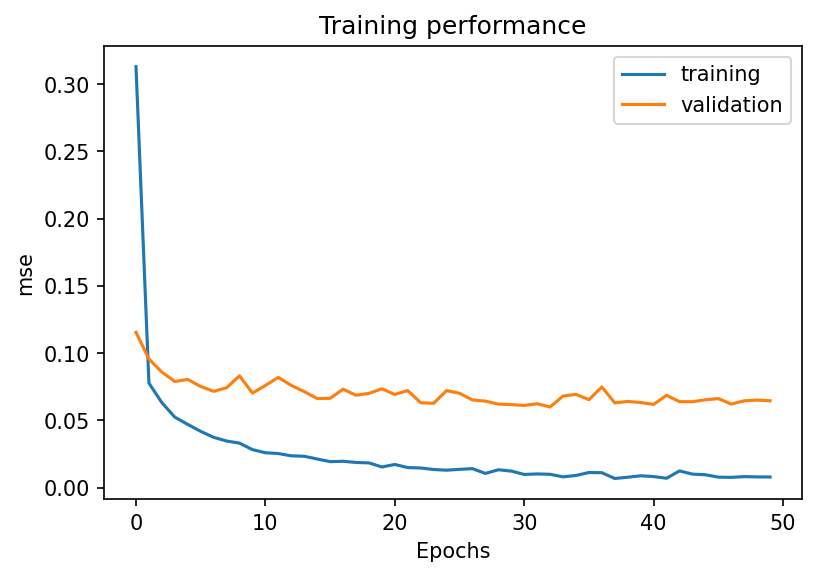

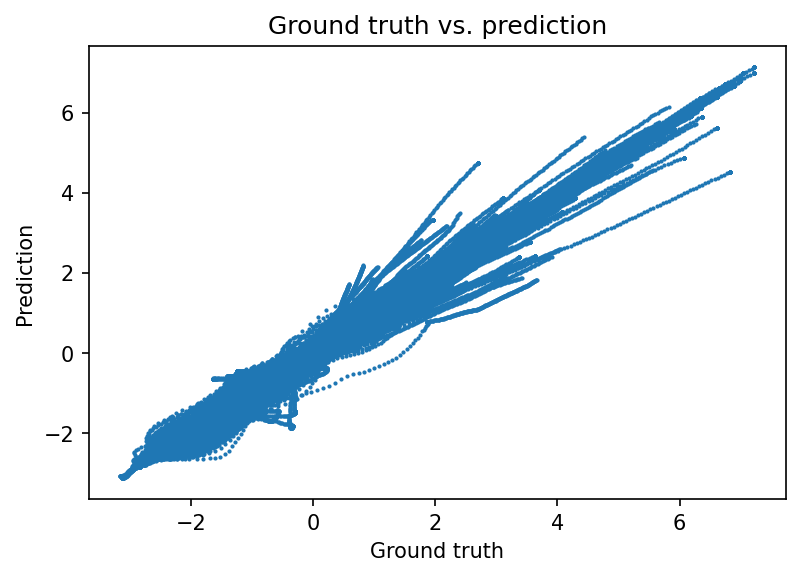

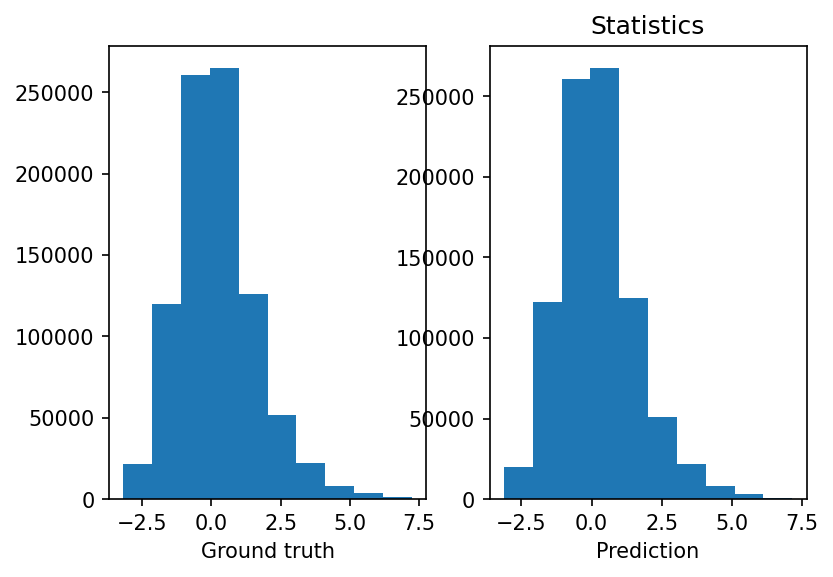

In [26]:
config = {
    'batch_size': 4096,
    'max_epochs': 50,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.005
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='best_model', config=config, verbose=True)
reg.training_summary()

### Other alternative: the model has already been trained

We just need to relaod it to make predictions.

In [6]:
reg.load(load_path='best_model')

## Visualization

### Prediction for single process parameter values

Text(0, 0.5, 'deviationc')

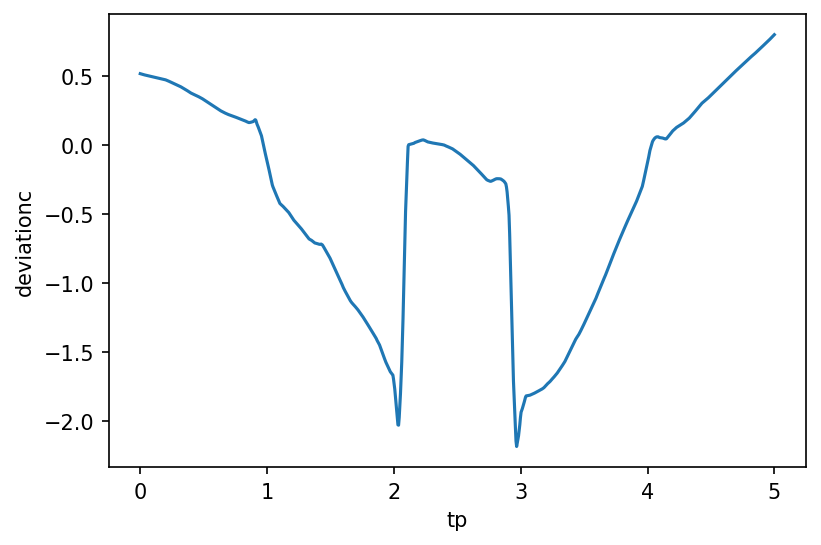

In [27]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft':410.0, 
        'Ziehspalt':2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30
    }, 
    nb_points=1000)

plt.figure()
plt.plot(x, y)
plt.xlabel('tp')
plt.ylabel('deviationc')

## Comparison with the ground truth on the training set

Randomly choose an id between 0 and 877 and compare the prediction to the ground truth.

Doe_ID 512


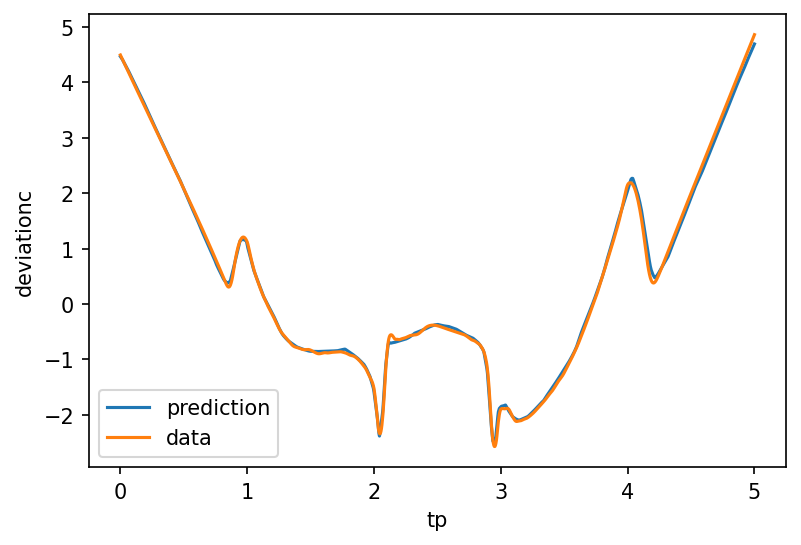

In [28]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
reg.compare(idx*1000, (idx+1)*1000)

In [29]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(FloatSlider(value=1.1862613636363641, description='Blechdicke', max=1.48, min=0.99, step…

## Alternative features

The features previsously chosen lead to a worse performance than the first manual trials... When using Material_ID and Stempel_ID instead of Blechdicke and Ziehspalt, it is satisfying again. 

In [34]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Material_ID', 
        'Niederhalterkraft', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Material_ID', 
        'Stempel_ID', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'tp',
    output = 'deviationc'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3200      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,377
Trainable params: 69,377
Non-traina

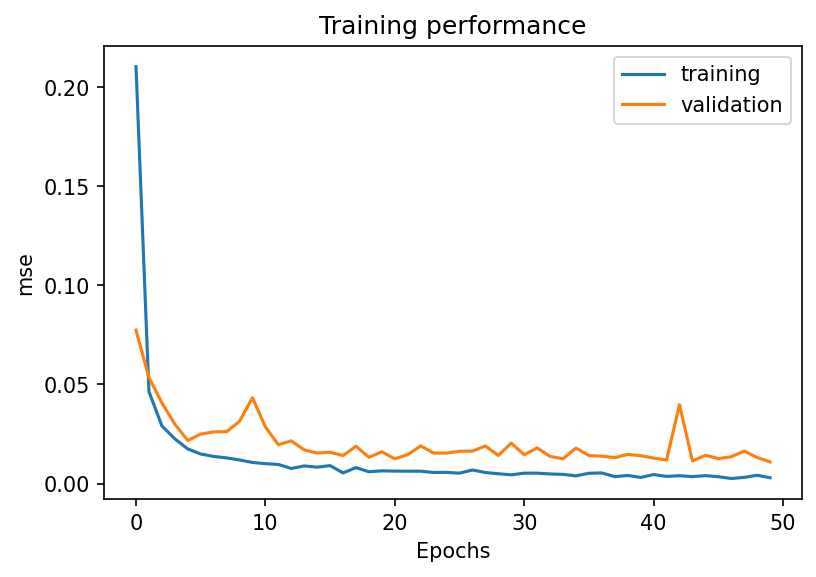

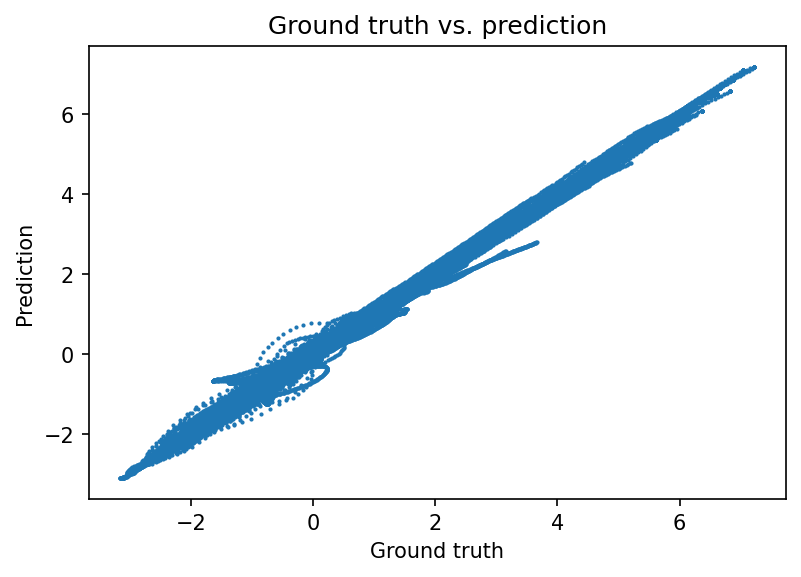

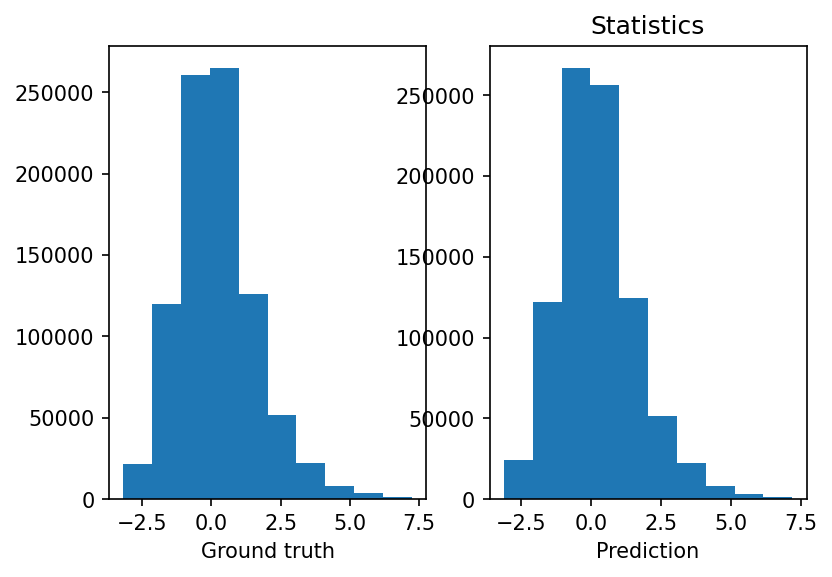

In [35]:
config = {
    'batch_size': 4096,
    'max_epochs': 50,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.005
}

reg.custom_model(save_path='best_model', config=config, verbose=True)
reg.training_summary()

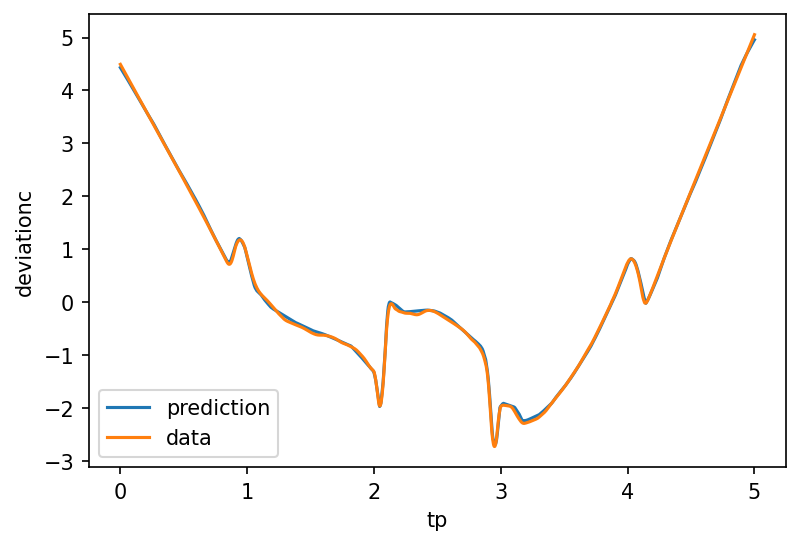

In [36]:
idx = np.random.choice(878)
reg.compare(idx*1000, (idx+1)*1000)

In [37]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(Dropdown(description='Material_ID', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(va…